QUESTION 1: AUTOENCODER

In [4]:
import keras
from keras import layers

from matplotlib import pyplot
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
from keras.layers import Input, Dense, Activation, Conv2D, Conv2DTranspose, UpSampling2D, MaxPooling2D, Flatten, BatchNormalization, Reshape
from keras.datasets import cifar10
import tensorflow_datasets as tfds



In [6]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train),32,32,3))
x_test = np.reshape(x_test, (len(x_test),32,32,3))

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


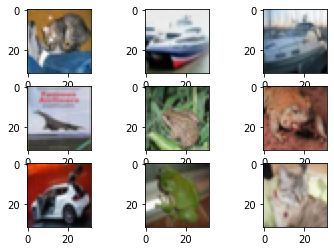

In [7]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_test[i])
# show the figure
pyplot.show()

In [9]:
input_img = tfk.Input(shape=(32,32,3))

x = tfkl.Conv2D(64,(3,3), activation='relu', padding = 'same')(input_img)
x = tfkl.MaxPooling2D((2,2), padding='same')(x)
x = tfkl.Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
encoded = tfkl.MaxPooling2D((2,2), padding='same')(x)

x = tfkl.Conv2D(128, (3,3), activation ='relu', padding = 'same')(encoded)
x = tfkl.UpSampling2D((2,2))(x)
x = tfkl.Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = tfkl.UpSampling2D((2,2))(x)
decoded = tfkl.Conv2D(3,(3,3), activation = 'sigmoid', padding = 'same')(x)

autoencoder = tfk.Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 16, 16, 128)      

In [10]:
# epochs = 5, and batch size = 256 per iteration
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
196/196 [==============================] - 469s 2s/step - loss: 0.5822 - accuracy: 0.6927 - val_loss: 0.5646 - val_accuracy: 0.7791
Epoch 2/5
196/196 [==============================] - 473s 2s/step - loss: 0.5620 - accuracy: 0.7884 - val_loss: 0.5608 - val_accuracy: 0.8016
Epoch 3/5
196/196 [==============================] - 471s 2s/step - loss: 0.5596 - accuracy: 0.8000 - val_loss: 0.5592 - val_accuracy: 0.7954
Epoch 4/5
196/196 [==============================] - 470s 2s/step - loss: 0.5581 - accuracy: 0.8055 - val_loss: 0.5581 - val_accuracy: 0.8112
Epoch 5/5
196/196 [==============================] - 468s 2s/step - loss: 0.5572 - accuracy: 0.8104 - val_loss: 0.5579 - val_accuracy: 0.8102


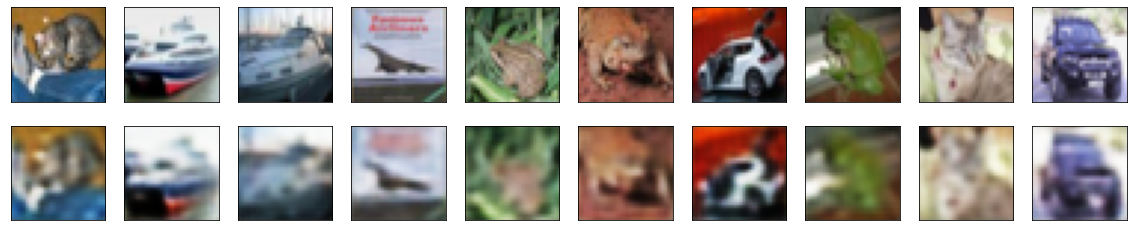

In [12]:
decoded_imgs = autoencoder.predict(x_test)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

QUESTION 2.1

In [13]:
# Description: 

# I am constructing a deep CNN with 3 hidden layers using 2D convolution layers. 
# 4 by 4 maxpooling layer and a 0.1 dropout regularization. 
# The two convolution layers' outputs are passed to a flatten layer, the dense layer with 64 units, a 0.3 dropout regularization. 
# A softmax output layer which predicts 10 categories. 
# No padding is used here. The 2D convolution layers both have  3 by 3 kernels with a stride of 1.


import numpy as np
import keras
from keras import layers
from keras import models
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [14]:
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [15]:
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Dropout(0.1))

In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 5, 5, 32)          18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0

In [18]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 44s 56ms/step - loss: 1.9796 - accuracy: 0.2539
Epoch 2/5
782/782 [==============================] - 43s 55ms/step - loss: 1.7237 - accuracy: 0.3610
Epoch 3/5
782/782 [==============================] - 43s 55ms/step - loss: 1.6257 - accuracy: 0.4032
Epoch 4/5
782/782 [==============================] - 43s 55ms/step - loss: 1.5545 - accuracy: 0.4316
Epoch 5/5
782/782 [==============================] - 43s 54ms/step - loss: 1.5053 - accuracy: 0.4548


In [19]:
# Model accuracy on the training set is:
score_train = model.evaluate(train_images, train_labels, verbose=0)
print(score_train[1])


0.44119998812675476


In [20]:
# Model accuracy on the testing set is:
score_test = model.evaluate(test_images, test_labels, verbose=0)
print(score_test[1])

0.43160000443458557


QUESTION 2.2

In [21]:
# Transfer Learning
# Using ResNet50 --- I can use other options too like VGG, etc.
from keras.applications import ResNet50


In [22]:
conv_base = ResNet50(weights ='imagenet', include_top = False, input_shape=(32,32,3))
conv_base.summary()

94773248/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
__________________________

In [23]:
model2_2 = models.Sequential()
model2_2.add(conv_base)
model2_2.add(layers.Flatten())
model2_2.add(layers.Dense(64, activation='relu'))
model2_2.add(layers.Dropout(0.3))
model2_2.add(layers.Dense(10, activation='softmax'))

conv_base.trainable = False


In [24]:
model2_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                131136    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 23,719,498
Trainable params: 131,786
Non-trainable params: 23,587,712
_________________________________________________________________


In [25]:
train_images.shape

(50000, 32, 32, 3)

In [26]:
model2_2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2_2.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 181s 231ms/step - loss: 2.2767 - accuracy: 0.1353
Epoch 2/5
782/782 [==============================] - 184s 235ms/step - loss: 2.1631 - accuracy: 0.1838
Epoch 3/5
782/782 [==============================] - 181s 231ms/step - loss: 2.1158 - accuracy: 0.2000
Epoch 4/5
782/782 [==============================] - 181s 232ms/step - loss: 2.0935 - accuracy: 0.2052
Epoch 5/5
782/782 [==============================] - 181s 231ms/step - loss: 2.0778 - accuracy: 0.2112


In [28]:
# Model accuracy on the training set is:
score_train = model2_2.evaluate(train_images, train_labels, verbose=0)
print(score_train[1])

# Model accuracy on the testing set is:
score_test = model2_2.evaluate(test_images, test_labels, verbose=0)
print(score_test[1])



0.2327200025320053
0.2337999939918518


QUESTION 3.1

In [114]:
# For this question, I am using SimpleRNN:
##########################################
import os
import numpy as np
import pandas as pd

import nltk

from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import TensorBoard, ModelCheckpoint

import matplotlib.pyplot as plt
from IPython.display import SVG, display

# -- ROC libs --
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [115]:
data = pd.read_csv('SPAM_detection.csv')

In [116]:
data.head()

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [117]:
data.shape

(5572, 2)

In [118]:
texts = data['Message']
labels = data['category_val']

In [119]:
print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [120]:
# number of words used as features
max_features = 10000
maxlen = 500
# cut off the words after seeing 500 words in each document(email)
tokenizer = Tokenizer()

tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

Found 9004 unique words: 
data shape:  (5572, 500)


In [121]:


# split the data into train and test set ---- 80% training - 20% testing
#train, test = train_test_split(text_data, test_size=0.2, random_state=42, shuffle=True)

# split into train test sets
#X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.20)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)

texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

In [122]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
60/60 [==============================] - 7s 111ms/step - loss: 0.3848 - acc: 0.8738 - val_loss: 0.1669 - val_acc: 0.9619
Epoch 2/10
60/60 [==============================] - 6s 96ms/step - loss: 0.1150 - acc: 0.9708 - val_loss: 0.0884 - val_acc: 0.9787
Epoch 3/10
60/60 [==============================] - 6s 94ms/step - loss: 0.1371 - acc: 0.9484 - val_loss: 0.0872 - val_acc: 0.9776
Epoch 4/10
60/60 [==============================] - 6s 95ms/step - loss: 0.1991 - acc: 0.9153 - val_loss: 0.4822 - val_acc: 0.7870
Epoch 5/10
60/60 [==============================] - 6s 94ms/step - loss: 0.1405 - acc: 0.9450 - val_loss: 0.2105 - val_acc: 0.9294
Epoch 6/10
60/60 [==============================] - 6s 94ms/step - loss: 0.1029 - acc: 0.9641 - val_loss: 0.1141 - val_acc: 0.9641
Epoch 7/10
60/60 [==============================] - 6s 94ms/step - loss: 0.0443 - acc: 0.9868 - val_loss: 0.0824 - val_acc: 0.9742
Epoch 8/10
60/60 [==============================] - 6s 94ms/step - loss: 0.0285 - 

In [123]:
#pred = model.predict_classes(texts_test)
acc = model.evaluate(texts_test, y_test)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))

35/35 [==============================] - 1s 19ms/step - loss: 0.0716 - acc: 0.9803
Test loss is 0.07 accuracy is 0.98  


In [131]:
# Calculate the predictions and false and true pos rates for plotting

y_pred1 = model.predict(texts_test)
fpr1, tpr1, thresholds1 = roc_curve(y_test,y_pred1)

QUESTION 3.2-- CNN

In [138]:
spamd = pd.read_csv('SPAM_detection.csv')

In [141]:
import re
# lowercase and remove punct
spamd.Message = spamd.Message.apply(lambda x: x.lower())
spamd.Message = spamd.Message.apply(lambda x: re.sub(r'[^\w\s]','',x) )

In [142]:
# split each message by character ahead of tokenizing

def concat_list(l):
  concat = ''
  for word in l:
      concat += word + ' '
  return concat

spamd.Message = [concat_list(data) for data in spamd.Message]

In [143]:
# set up the character level tokenizer to preprocess the data

from keras.preprocessing import text as keras_text, sequence as keras_seq

tokenizer2 = Tokenizer(filters ='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True,char_level = True, oov_token =True)
tokenizer2.fit_on_texts(spamd.Message.values)

In [144]:
# tokenize the text and turn the labels into a usable array

X = tokenizer2.texts_to_sequences(spamd.Message.values)
X = pad_sequences(X, maxlen = 50)

print('Shape of data tensor:', X.shape)

Y = np.array(spamd.category_val)
print('Shape of label tensor:', Y.shape)

Shape of data tensor: (5572, 50)
Shape of label tensor: (5572,)


In [145]:
# another method to split test & training sets -- different from 3.1
# same split --- 80-20
from sklearn.model_selection import train_test_split

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y,test_size = 0.2)

In [165]:
# set up the 1D model:
model2 = Sequential()

model2.add(Embedding(10000,250,input_length=X_train2.shape[1]))
model2.add(layers.Conv1D(32,5,activation='tanh'))
model2.add(GlobalMaxPooling1D())
model2.add(layers.Dense(1,activation="sigmoid"))

In [166]:
model2.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['acc'])

cnn_history = model2.fit(X_train2,Y_train2,epochs = 5,validation_data = (X_test2, Y_test2), batch_size = 64,verbose=1)

Epoch 1/5
70/70 [==============================] - 4s 63ms/step - loss: 0.2906 - acc: 0.8966 - val_loss: 0.1794 - val_acc: 0.9462
Epoch 2/5
70/70 [==============================] - 4s 62ms/step - loss: 0.1578 - acc: 0.9569 - val_loss: 0.1745 - val_acc: 0.9480
Epoch 3/5
70/70 [==============================] - 4s 62ms/step - loss: 0.1460 - acc: 0.9589 - val_loss: 0.1641 - val_acc: 0.9462
Epoch 4/5
70/70 [==============================] - 4s 62ms/step - loss: 0.1352 - acc: 0.9614 - val_loss: 0.1586 - val_acc: 0.9525
Epoch 5/5
70/70 [==============================] - 4s 61ms/step - loss: 0.1292 - acc: 0.9634 - val_loss: 0.1533 - val_acc: 0.9534


In [167]:
acc2 = model2.evaluate(X_test2,Y_test2)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc2[0],acc2[1]))

35/35 [==============================] - 0s 4ms/step - loss: 0.1533 - acc: 0.9534
Test loss is 0.15 accuracy is 0.95  


In [168]:
# Calculate the predictions and false and true pos rates for plotting

y_pred2 = model2.predict(X_test2)
fpr2, tpr2, thresholds2 = roc_curve(Y_test2,y_pred2)

QUESTION 3.3

In [169]:
from sklearn.metrics import auc
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2,tpr2)

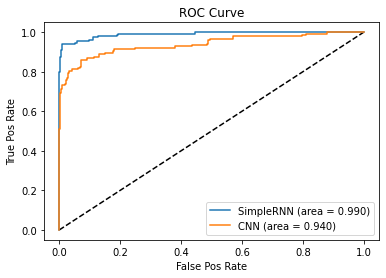

In [170]:
# Both methods seem to give us similar results.
# plotting the ROC curve for both models

plt.figure(1)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1,tpr1, label = 'SimpleRNN (area = {:.3f})'.format(auc1))
plt.plot(fpr2,tpr2, label = 'CNN (area = {:.3f})'.format(auc2))

plt.xlabel('False Pos Rate')
plt.ylabel('True Pos Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()